理論の分野では数列の極限を議論することがありますが、そのときに次の上極限と下極限の概念が便利です。

* 上極限：$\lim \sup_n a_n = \inf_n \{\sup_{n\leq m} a_m\}$
* 下極限：$\lim \inf_n a_n = \sup_n \{\inf_{n\leq m} a_m\}$

上極限は単調減少であり、下極限は単調増加です。また、その両方が一致する場合、数列は極限値を持ちます。

Text(0.5, 0, 'n')

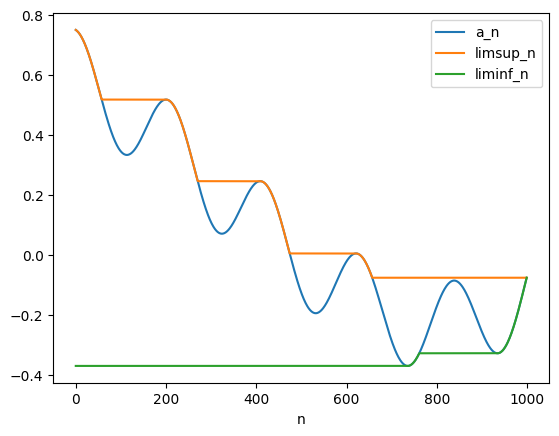

In [49]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 1, 1000)
a_n = x ** 4 - 0.7 * x **2 + 0.3 - x + 1.5 * np.cos(30 * x) * 0.1 + 0.3

plt.plot(a_n, label="a_n")

limsup = 100
limsup_n = []

liminf = -100
liminf_n = []
for n in range(len(a_n)):
    limsup = min(np.max(a_n[n:]), limsup)
    limsup_n.append(limsup)

    liminf = max(np.min(a_n[n:]), liminf)
    liminf_n.append(liminf)


plt.plot(limsup_n, label="limsup_n")
plt.plot(liminf_n, label="liminf_n")
plt.legend()
plt.xlabel("n")

また、これを応用して、関数列についての上極限、下極限も定義できます

* 上極限：$\lim \sup_{n\to \infty} f_n : x \to \lim\sup_{n \to \infty} f_n(x)$
* 下極限：$\lim \inf_{n\to \infty} f_n : x \to \lim\inf_{n \to \infty} f_n(x)$

つまり、各点$x$について、上極限は単調減少であり、下極限は単調増加です。また、その両方が一致する場合、関数列は極限値を持ちます。
さらに、$f_n$が可測であれば、上極限、下極限、極限はすべて可測関数です。

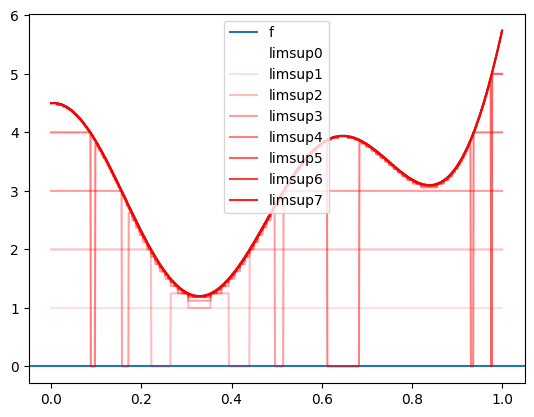

In [60]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 1, 1000)

# 適当な関数 f
f = x ** 4 - 0.7 * x **2 + 0.1 * x + 1.5 * np.cos(10 * x) * 0.1 + 0.3
f = f * 10
plt.plot(x, f, label="f")
plt.axhline(y=0.0)

for n in range(8):
    j = np.arange(n * 2 ** n)
    a_j = j / 2 ** n

    idx_f_geq_n = f > n

    f_n = np.zeros(1000)
    f_n += n * (f >= n)  # nより大きい点はnとおく

    # それ以外の点は下から近似
    for j in range(1, n * 2 ** n - 1):
        a_j_1 = (j - 1) / 2 ** n
        a_j = j / 2 ** n
        f_n += a_j_1 * (a_j_1 <= f) * (f < a_j)

    plt.plot(x, f_n, label=f"limsup{n}", color = "r", alpha=n / 8)
    plt.legend()

また、集合列にたいしても上極限や下極限が定義できます

* 上極限：$\lim \sup_{n\to \infty} A_n = \cap^\infty_{n=1} \cup^{\infty}_{k=n} A_k$
* 下極限：$\lim \inf_{n\to \infty} A_n = \cup^\infty_{n=1} \cap^{\infty}_{k=n} A_k$

下のPythonは雰囲気のコードです（別にliminfやlimsupは計算していません）

下極限（liminf）は内側から広げるイメージ、上極限（limsup）は外側から縮めるイメージです。

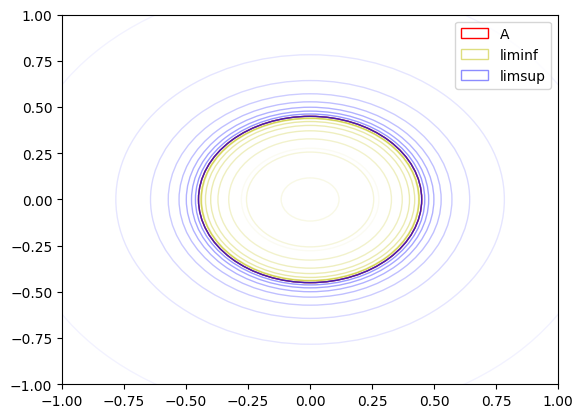

In [95]:
import matplotlib.pyplot as plt


ax = plt.gca()
n = 10
A_n = []
limit = 0.05 * 9
circle = plt.Circle((0, 0), limit, color="r", fill=False, label="A")
ax.add_patch(circle)

# 下極限（liminf）は内側から広げる感じです
circle = plt.Circle((0, 0), (9 - n) / (10*n + 1) + limit, alpha=0.05 * n, fill=False, color="y", label="liminf")
ax.add_patch(circle)

for n in range(10):
    circle = plt.Circle((0, 0), (n - 9) / (10*n + 1) + limit, alpha=0.05 * n, fill=False, color="y")
    ax.add_patch(circle)

# 上極限（limsup）は外側から縮める感じです
circle = plt.Circle((0, 0), (9 - n) / (10*n + 1) + limit, alpha=0.05 * n, fill=False, color="b", label="limsup")
ax.add_patch(circle)

for n in reversed(range(10)):
    circle = plt.Circle((0, 0), (9 - n) / (10*n + 1) + limit, alpha=0.05 * n, fill=False, color="b")
    ax.add_patch(circle)

plt.xlim(-1, 1)
plt.ylim(-1, 1)

plt.legend()